# Cifar10 Dataset , CNN vs ANN

In [74]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [75]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [76]:
x_train.shape

(50000, 32, 32, 3)

In [77]:
x_test.shape

(10000, 32, 32, 3)

In [78]:
y_train.shape

(50000, 1)

In [79]:
y_test.shape

(10000, 1)

# Converting y_train to 1D from 2D

In [80]:
y_train = y_train.reshape(-1,)

In [81]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [82]:
classes[0]

'airplane'

In [83]:

def plot_sample(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

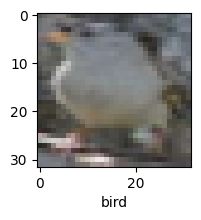

In [84]:
plot_sample(x_train,y_train,8800)

# Scaling x_train and x_train in range 0-1

In [85]:
x_train = x_train/255
x_test = x_test/255

In [86]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# ANN performance which takes lot of time

In [88]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

## Accuracy was 47% of ANN

In [ ]:
model.evaluate(x_test,y_test)

# CNN

In [89]:
cnn = models.Sequential([
#     cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [50]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 1.4827 - accuracy: 0.4691
Epoch 2/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.1215 - accuracy: 0.6069
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9824 - accuracy: 0.6587
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8930 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8259 - accuracy: 0.7126
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7673 - accuracy: 0.7310
Epoch 7/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.7222 - accuracy: 0.7473
Epoch 8/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6743 - accuracy: 0.7650
Epoch 9/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6329 - accuracy: 0.7771
Epoch 10/10
1563/1563 [==============================] - 73s 47m

## Accuracy of CNN 

In [51]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 6s 16ms/step - loss: 0.9234 - accuracy: 0.6896


[0.9234282374382019, 0.6895999908447266]

In [53]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 6s 15ms/step


In [54]:
y_pred[0]

array([1.7391393e-04, 9.7647205e-04, 3.0586789e-03, 7.6064444e-01,
       1.0295842e-03, 1.9515395e-01, 3.6122113e-02, 1.3271143e-03,
       1.1679882e-03, 3.4576608e-04], dtype=float32)

In [59]:
np.argmax(y_pred[1200])

8

In [58]:
y_test[1200]

array([8], dtype=uint8)

In [60]:
y_classes = [np.argmax(element) for element in y_pred]

In [61]:
y_classes[0]

3

In [103]:
classes[y_classes[3331]]

'ship'

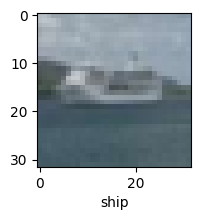

In [104]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test,3331)

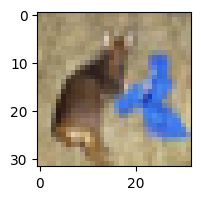

In [91]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[3600])